# Mean Shift

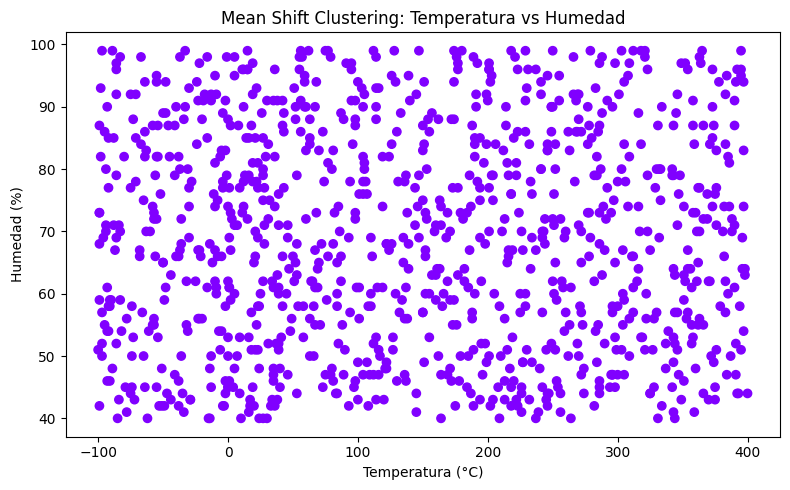

In [2]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
df = pd.read_csv('Historia_Climatica.csv')

# Escalar los datos
X = df[["Temperatura_C", "Humedad_%", "Vel_Viento_mps", "Presion_hPa"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar MeanShift sobre los datos escalados
modelo_meanshift = MeanShift()
y_pred_meanshift = modelo_meanshift.fit_predict(X_scaled)

# Visualización (Temperatura vs Humedad)
plt.figure(figsize=(8, 5))
plt.scatter(X["Temperatura_C"], X["Humedad_%"], c=y_pred_meanshift, cmap='rainbow')
plt.title("Mean Shift Clustering: Temperatura vs Humedad")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.tight_layout()
plt.show()

Se detectó un solo clúster (toda la nube tiene un único color). 
- Si se desea forzar múltiples grupos, puedo ayudarte a: Estimar un mejor bandwidth.

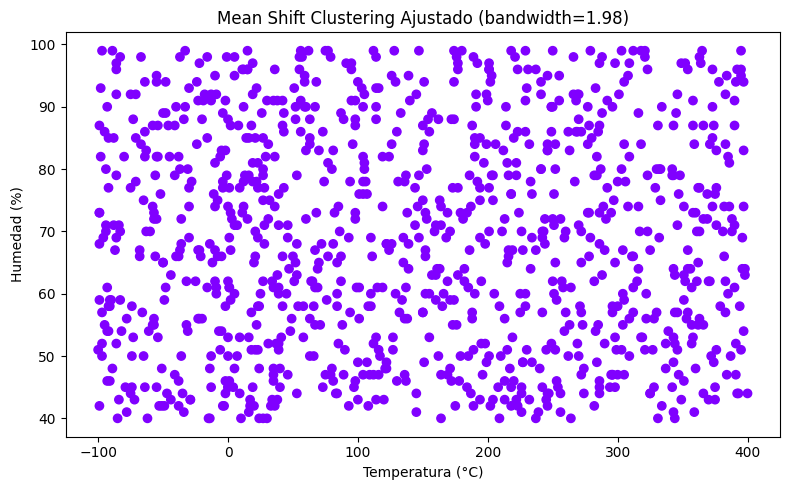

In [3]:
from sklearn.cluster import estimate_bandwidth

# Estimar el parámetro bandwidth automáticamente
bandwidth_estimado = estimate_bandwidth(X_scaled, quantile=0.2, n_samples=500)

# Aplicar MeanShift con el bandwidth ajustado
modelo_meanshift_bandwidth = MeanShift(bandwidth=bandwidth_estimado)
y_pred_bandwidth = modelo_meanshift_bandwidth.fit_predict(X_scaled)

# Visualización: Temperatura vs Humedad con bandwidth ajustado
plt.figure(figsize=(8, 5))
plt.scatter(X["Temperatura_C"], X["Humedad_%"], c=y_pred_bandwidth, cmap='rainbow')
plt.title(f"Mean Shift Clustering Ajustado (bandwidth={bandwidth_estimado:.2f})")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.tight_layout()
plt.show()

In [4]:
import numpy as np

# Contar la cantidad de clústeres distintos encontrados
np.unique(y_pred_bandwidth, return_counts=True)

(array([0]), array([1008]))

El modelo Mean Shift con bandwidth ajustado sigue detectando solo un clúster (0) para todos los datos.

Esto confirma que, aunque se haya estimado un bandwidth, los datos no tienen densidades suficientemente distintas para que el algoritmo genere múltiples grupos.